# Model optimization for 24 hours weather forecast

* Montior loss function trend over epoch for training and validating datasets

## Gated Recurrent Model (GRU) Configuration
- Multi layer model
- 0.03 for dropout and recurrent dropout

###  Program

```python3
$ ./../GRU.py -e -i ./../data/jena_climate_2009_2016.csv

Where,
-e: merge embedded columns
```

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors

import seaborn as sns

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

font      = {'family':'arial', 'style':'normal', 'size':18}
axis_font = {'family':'arial', 'style':'normal', 'size':18}
plt.rc('font', **font)

In [3]:
import pandas as pd

pd_data = pd.read_csv("./data/GRU_merge_hist_01.log")
pd_data.head()

,epoch,loss,val_loss
0,1,0.28414,0.13256
1,2,0.14911,0.14045
2,3,0.14040,0.12985
3,4,0.13675,0.12993
4,5,0.13020,0.13310


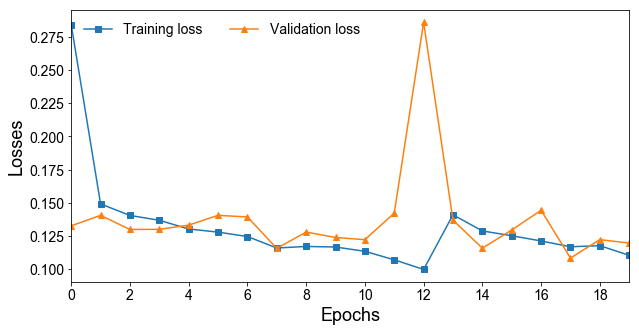

In [13]:
import numpy as np

fig = plt.figure(figsize=(10, 5))
pd_data.loss.plot(style='s-', label='Training loss')
pd_data.val_loss.plot(style='^-', label='Validation loss')

ts_in_epochs = pd_data["epoch"].tolist()
ts_xlabels = np.arange(0, len(ts_in_epochs), 2)
plt.xticks(ts_xlabels, ts_xlabels, fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel("Epochs", axis_font)
plt.ylabel("Losses", axis_font)
plt.legend(ncol=2, frameon=False, fontsize=14)

### Remarks and Future Directions
- The loss values are very close to each other except at epoch 12 where validation loss value reached to spike high of above 0.275. 
- Apparently, errors did not drop below 0.12 (with few excpetions), which yielded the mean absolute error of 0.12 on test dataset.
- More data with availability of computing resource can allow to explore the best parameters to improve the performance. 

## Long short-term memory (LSTM) configuration
- Multi layer model
- 0.03 for dropout and recurrent dropout

###  Program

```python3
$ ./../LSTM.py -e -i ./../data/jena_climate_2009_2016.csv

Where,
-e: merge embedded columns
```

In [15]:
import pandas as pd

pd_LSTM = pd.read_csv("./data/LSTM_merge_hist_02.log")
pd_LSTM.head()

,epoch,loss,val_loss
0,1,0.45,0.13
1,2,0.15,0.14
2,3,0.14,0.15
3,4,0.14,0.13
4,5,0.13,0.13


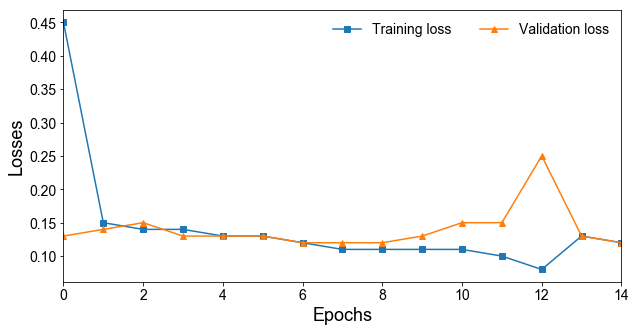

In [17]:
fig = plt.figure(figsize=(10, 5))
pd_LSTM.loss.plot(style='s-', label='Training loss')
pd_LSTM.val_loss.plot(style='^-', label='Validation loss')

ts_in_epochs = pd_LSTM["epoch"].tolist()
ts_xlabels = np.arange(0, len(ts_in_epochs), 2)
plt.xticks(ts_xlabels, ts_xlabels, fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel("Epochs", axis_font)
plt.ylabel("Losses", axis_font)
plt.legend(ncol=2, frameon=False, fontsize=14)